# Tutorial for Calculua
## Part 3: Multivariable Calculus

We have already seen three-dimensional plotting, so it is not surprising that Sage has support for a variety of multivariable calculus problems.

In [1]:
var('y')
f(x,y)=3*sin(x)-2*cos(y)-x*y

Above, we have defined a typical function of two variables.

Below, we use the separating semicolons to demonstrate several things one might do with such a function, including:

- The gradient vector of all $\frac{\partial f}{\partial x_i}$
- The Hessian of all possible second derivatives
- A double partial derivative of $f$ with respect to $x$, then $y$ (that is, $\frac{\partial f}{\partial y\partial
x}$)

In [2]:
f.gradient()

(x, y) |--> (-y + 3*cos(x), -x + 2*sin(y))

In [3]:
f.hessian()

[(x, y) |--> -3*sin(x)        (x, y) |--> -1]
[       (x, y) |--> -1  (x, y) |--> 2*cos(y)]

In [4]:
f.diff(x,y)

(x, y) |--> -1

In an effort to make the syntax simpler, the gradient and Hessian are also available by asking for a total derivative. We also ask for nicer output again.

In [5]:
f.diff()

(x, y) |--> (-y + 3*cos(x), -x + 2*sin(y))

In [6]:
f.diff(2)

[(x, y) |--> -3*sin(x)        (x, y) |--> -1]
[       (x, y) |--> -1  (x, y) |--> 2*cos(y)]

If we take the determinant of the Hessian, we get something useful for evaluating (the two-dimensional) critical points of $f$.

In [7]:
f.diff(2).det()

(x, y) |--> -6*cos(y)*sin(x) - 1

### Vector Fields
These ideas are particularly helpful if one wants to plot a vector field.

The following example is of the gradient. The vector plotted in the cell below is the unit vector in the direction $(1,2)$.

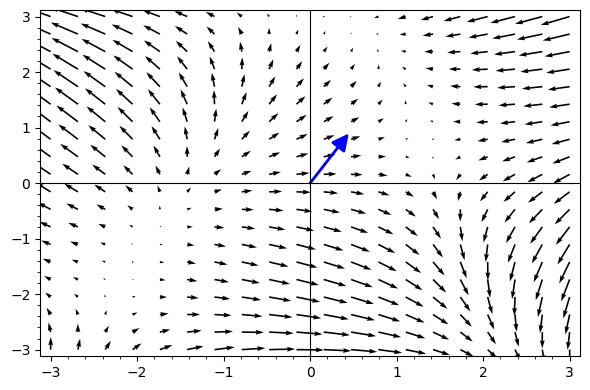

In [8]:
P=plot_vector_field(f.diff(), (x,-3,3), (y,-3,3))
u=vector([1,2])
Q=plot(u/u.norm())
P+Q

Rather than actually figure out the unit vector in that direction, it’s easier to let Sage compute it by dividing the vector by its norm.

The [directional derivative](https://en.wikipedia.org/wiki/Directional_derivative) itself (in that direction, at the origin) can also be computed in this way.

In [9]:
(f.diff()*u/u.norm())(0,0)

3/5*sqrt(5)

### Contout Plots

Another useful type of plot in these situations is a contour plot.

Notice that the one below uses several options. Try to correlate the options with features of the graphic.

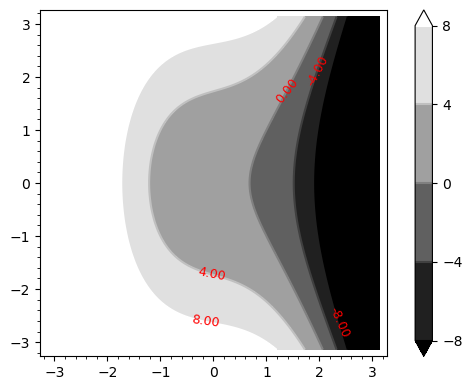

In [10]:
y = var('y')
contour_plot(y^2 + 1 - x^3 - x, (x,-pi,pi), (y,-pi,pi), contours=[-8,-4,0,4,8], colorbar=True, labels=True, label_colors='red')

In this one, we have used options to:

- Explicitly list the contours we want to show,
- Label these contours,
- Place a color bar on the side to show the different levels.

(Incidentally, the `True` and `False` valued options are some of the few non-numerical ones that do not need quotes.)

This is another good time to remind us we must explicitly ask for `y` to be a variable here, as will be the case a few more times.


### Exploring Sage features
As you gain experience in Sage, we will slowly explain less and less of the syntax of commands in these tutorials. You can think of places where not everything is explained as a mini-quiz.

For example, the next example shows how one currently does a multiple integral. What have we done here?

In [11]:
integrate(integrate(f,(x,0,pi)),(y,0,pi))

6*pi - 1/4*pi^4

Answer: notice that `integrate(f,(x,0,pi))` has been itself placed as the function inside `integrate(...,(y,0,pi))`.

We could use a 3D plot to help visualize this; these were already mentioned in the symbolics and plotting tutorial.

In [12]:
plot3d(f,(x,0,pi),(y,0,pi),color='red')+plot3d(0,(x,0,pi),(y,0,pi))

Graphics3d Object

### Parametric plots
In addition to multivariate calculus, multivatiate calculues often covers parametric calculus of a single variable. Sage can do arbitrary parametric plots, with fairly natural syntax.

This plot shows the tangent line to the most basic Lissajous curve at $t=1$. The commands should be strongly reminiscent of the ones at the beginning of this tutorial.

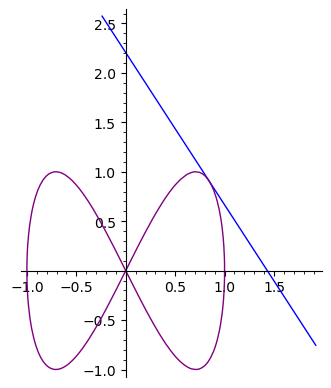

In [13]:
t = var('t')
my_curve(t)=(sin(t), sin(2*t))
PP=parametric_plot( my_curve, (t, 0, 2*pi), color="purple" )
my_prime=my_curve.diff(t)
L=my_prime(1)*t+my_curve(1) 
parametric_plot(L, (t,-2,2))+PP

### Exercise 
Before moving out of the calculus world, it is good to have a sort of miniature exam.

In the cell below, we have plotted and given:

A slope field for a differential equation,

A solution to an initial value problem,

And a symbolic formula for that solution.

We assume you have never seen several of the commands before. Can you nonetheless figure out which commands are doing each piece, and what their syntax is? How would you look for help to find out more?

In [14]:
y = var('y')
Plot1=plot_slope_field(2-y,(x,0,3),(y,0,20))
y = function('y')(x) 
h = desolve(diff(y,x) + y - 2, y, ics=[0,7])
Plot2=plot(h,0,3)
expand(h)

5*e^(-x) + 2

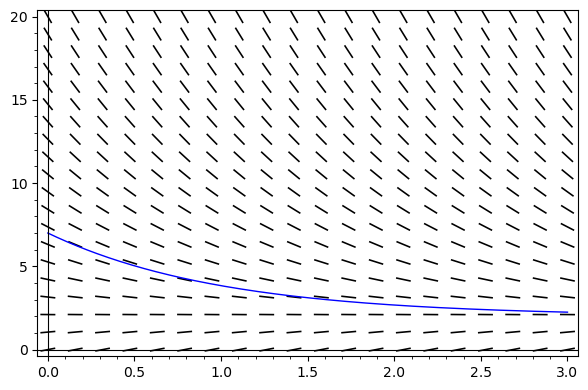

In [15]:
show(Plot1+Plot2)

Ready to see the answers? Do not peek until you have really tried it.

In this cell we do the following:

- Make sure that `y` is indeed a variable for the first plot.
- Create a slope field for the DE for appropriate inputs of `x` and `y`, and give the plot the name Plot1.
- Use the formalism of the function command to get ready for the DE.
    - Notice we have here once again used # to indicate a comment.
    - In this case, in order to use common terminology, we now have told Sage `y` is no longer a variable, but instead a function (abstract) of the variable `x`.
- Use the differential equation solving command, with **I**nitial **C**ondition **S** of 2 and 2.
- Plot the solution and give it the name `Plot2`.
- Show a simplification of the symbolic version of the solution (which we did not know ahead of time!) as well as the sum of the two graphs - the solution against the slope field.

As you gain experience, you will see how to glean what you are looking for from examples in the documentation like this - which is one of the real goals of these tutorials.

**Congratulations! You are now armed with the basics of deploying Sage in the calculus sequence.**
